# Team Homework 12: Inference for Regression

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 

This team homework is based on Lecture 33: Regression Inference. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Regression Inference](https://inferentialthinking.com/chapters/16/Inference_for_Regression.html)


In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

We'll combine two ideas from previous chapters: inference through bootstrapping, and the least square regression model. Read and run the following code, and describe what is used to create the plot shown below. 

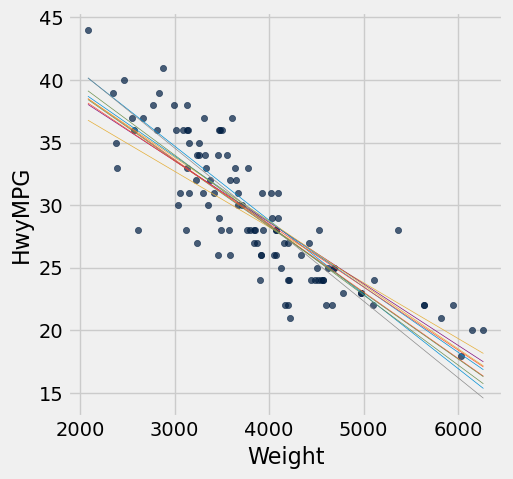

In [10]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, xlabel, ylabel):
    return np.mean(standard_units(t.column(xlabel))*standard_units(t.column(ylabel)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def scatter_bootstrap_regression(table, nsamples, xlabel, ylabel):
    xmin = np.min(table.column(xlabel))
    xmax = np.max(table.column(xlabel))
    xlimits = np.array([xmin, xmax])    
    table.scatter(xlabel, ylabel)
    for i in np.arange(nsamples):
        resampled_table = table.sample() # default is the same size
        m = slope(resampled_table, xlabel, ylabel) 
        b = intercept(resampled_table, xlabel, ylabel)
        plots.plot(xlimits, m*xlimits + b, lw=0.5)
    
cars = Table().read_table('Cars2015.csv')
scatter_bootstrap_regression(cars, 10, 'Weight', 'HwyMPG')

### Bootstrapping Inference for Slope

157 customers at a restaurant participated in a survey. The amount of the bill and the tip percentage (defined as amount of tip divided by the total bill) were shown in the scatter plot on the top right. 5000 bootstrap samples were taken from the original data, and the slopes of the least square lines were shown in the dot plot on the left. 

<img src = "boostrap_slope.GIF" width=800>

Based on these bootstrap slopes, the 2nd percentile was found to be 0.004, and 3rd percentil was 0.008. Can you use these figures and the graph to produce a 95% confidence interval for the slope? 

Based on your confidence interval, is there evidence to suggest that you can predict the tip percentage from the total amount of the bill? 